# INAUGURAL PROJECT

Import the needed packages.

In [2]:
from types import SimpleNamespace
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import statsmodels.api as sm
import pandas as pd
from tabulate import tabulate
%load_ext autoreload
%autoreload 2

from HouseholdSpecializationModel_Exam import HouseholdSpecializationModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

Illustrate how $H_F/H_M$ changes when varying $\alpha={0.25, 0.5, 0.75}$ and $\sigma={0.5, 1.0, 1.5}$

The code below is used for creating a table with the ratio of $H_F/H_M$ for varying values of $\alpha$ and $\sigma$.

In [3]:
# Question 1, table

# Create an instance of the model
model = HouseholdSpecializationModelClass()

# Define the values of alpha and sigma 
alpha_vals = [0.25, 0.5, 0.75]
sigma_vals = [0.5, 1.0, 1.5]

# Create an empty data frame
results_df = pd.DataFrame(columns=['alpha', 'sigma'])

#Loop over alpha and sigma values and solve the model for each combination
for alpha in alpha_vals:
    for sigma in sigma_vals:
        # Set the parameter values 
        model.par.alpha = alpha 
        model.par.sigma = sigma 

        # Solve the model 
        opt = model.solve_discrete()
        resultat = opt.HF / opt.HM
        
        #Store the results in the DataFrame
        results_df = pd.concat([results_df, pd.DataFrame({'alpha': alpha, 'sigma': sigma, 'Ratio HF/HM': resultat}, index=[0])], ignore_index=True)

# Reshape the data into a 3x3 matrix
matrix = results_df.pivot(index='alpha', columns='sigma', values='Ratio HF/HM')

# Print the results
df=pd.DataFrame(matrix)
df.style

c:\Users\Carsten\OneDrive\Desktop\pyton\HouseholdSpecializationModel3.py:62: RuntimeWarning: divide by zero encountered in power
  H = ((1-par.alpha)*HM**((par.sigma-1+1e-8)/par.sigma)+par.alpha*HF**((par.sigma-1+1e-8)/par.sigma))**(par.sigma/(par.sigma-1+1e-8))
c:\Users\Carsten\OneDrive\Desktop\pyton\HouseholdSpecializationModel3.py:62: RuntimeWarning: divide by zero encountered in power
  H = ((1-par.alpha)*HM**((par.sigma-1+1e-8)/par.sigma)+par.alpha*HF**((par.sigma-1+1e-8)/par.sigma))**(par.sigma/(par.sigma-1+1e-8))
c:\Users\Carsten\OneDrive\Desktop\pyton\HouseholdSpecializationModel3.py:62: RuntimeWarning: divide by zero encountered in power
  H = ((1-par.alpha)*HM**((par.sigma-1+1e-8)/par.sigma)+par.alpha*HF**((par.sigma-1+1e-8)/par.sigma))**(par.sigma/(par.sigma-1+1e-8))


sigma,0.500000,1.000000,1.500000
alpha,,,
0.250000,0.545455,0.307692,0.214286
0.500000,1.000000,1.000000,1.000000
0.750000,1.833333,3.250000,4.666667


The code below is used to create a figure of the results from the table above. This is done to better illustrate the result, and get a better understanding of the results. 

C:\Users\Carsten\AppData\Local\Temp\ipykernel_23200\2534527495.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


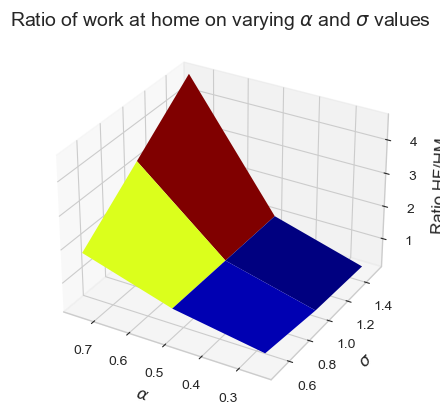

In [4]:
# Question 1, Figure 

# Import plot modules
%matplotlib inline
plt.style.use('seaborn-whitegrid')
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm 

# Create the figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract the values from the results DataFrame
x = results_df['alpha']
y = results_df['sigma']
z = results_df['Ratio HF/HM']

# Reshape the data into a grid
X, Y = np.meshgrid(np.unique(x), np.unique(y), indexing="ij")
Z = z.values.reshape(len(np.unique(y)), len(np.unique(x)))

# Create the surface plot
ax.plot_surface(X, Y, Z, cmap=cm.jet)

# Invert the x-axis
ax.invert_xaxis()

# Set the labels for the axes
ax.set_xlabel(r'$\alpha$', fontsize=12)
ax.set_ylabel(r'$\sigma$', fontsize=12)
ax.set_zlabel('Ratio HF/HM', fontsize=12)

# Show the plot
plt.title('Ratio of work at home on varying ' + r'$\alpha$' + ' and ' + r'$\sigma$' + ' values', fontsize=14)
plt.show()

This figure shows the ratio for varying values of $\alpha$ and $\sigma$. 

The figure can be interpreted as $\alpha$ and $\sigma$ both having a positive effect on the ratio. When $\alpha$ and $\sigma$ increases, this increases the ratio, which means that women will work relatively more at home compared to men. We see that when $\alpha$ is 0.25, then an increasing $\sigma$ will decrease the ratio, while for a high $\alpha$ of 0.5, then an increasing $\sigma$ will increase the ratio. When $\alpha$ is exactly equal to 0.75, then ratio is 1, which means that men and women are working exactly equal amount of hours at home. The intuition behind the results is as $\alpha$ increases, the women become relatively more productive in home production compared to men, and hence the ratio increases. When $\sigma$ increases the elasticity of substitution increases, which for $\alpha<0.5$ implies a lower ratio, and for $\alpha>0.5$ implies a higher ratio, due to the fact that when the elasticity of substitution increases it is easier to substitute between women and men working at home, which means the effect from $\alpha$ will dominate their choices.
When $\sigma>1$ there is increasing return to scale in household production, which implies positive effects from specialization in home production and hence more dependency on the $\alpha$ parameter.

# Question 2 

The code below is used to plot the $\log\left(\frac{H_F}{H_M}\right)$ against $\log\left(\frac{w_F}{w_M}\right)$ for $w_F = [0.8, 0.9, 1.0, 1.1, 1.2]$

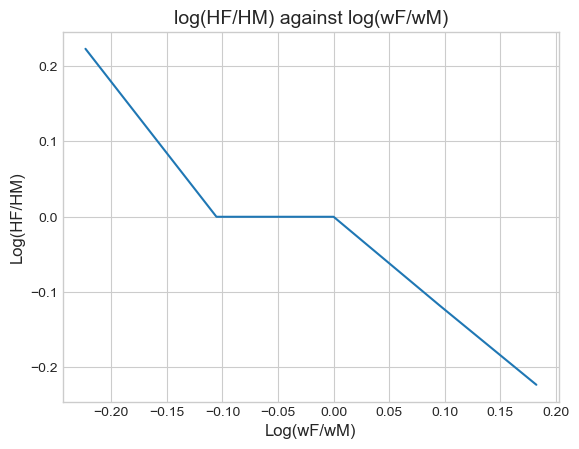

In [5]:
# Question 2, Plot

# Create vector for wF
model.par.wF_vec = np.array([0.8, 0.9, 1.0, 1.1, 1.2])

# create empty lists to store log(HF/HM) and log(wF/wH)
log_HF_HM_list = []
log_wF_wM_list = []

# loop over the values in wF_vec and solve the model for each value
for wF in model.par.wF_vec:
    model.par.wF = wF
    model.par.sigma = 1
    model.par.alpha = 0.5 
    opt = model.solve_discrete()
    log_HF_HM_list.append(math.log(opt.HF_HM))
    log_wF_wM_list.append(math.log(wF / model.par.wM))

# plot log(HF/HM) against log(wF/wH)
plt.plot(log_wF_wM_list, log_HF_HM_list)
plt.xlabel('Log(wF/wM)', fontsize=12)
plt.ylabel('Log(HF/HM)', fontsize=12)
plt.title('log(HF/HM) against log(wF/wM)', fontsize=14)
plt.show()


The figure above shows a negative correlation between the change in wages from working in the market and the change in ratio of hours working at home. The figure shows that when men and women earns the same from working in the market, they are working an equal amount of hours at home. When women earns less than men, then women works more at home than men, and vice versa when men women earns more than men. This is in line with our theoretical expectations, and we assume that the causality goes from the wages to the hours working at home.

# Question 3 

The code below is used to plot the $\log\left(\frac{H_F}{H_M}\right)$ against $\log\left(\frac{w_F}{w_M}\right)$ for $w_F = [0.8, 0.9, 1.0, 1.1, 1.2]$ when the choice set is continuous. 

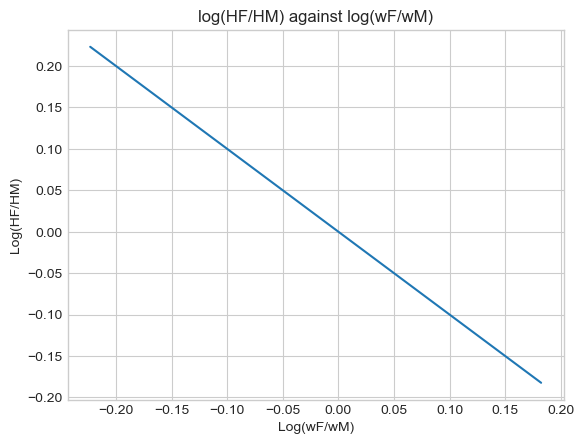

In [6]:
# Question 3, Plot

# create empty lists to store log(HF/HM) and log(wF/wH)
log_HF_HM_list = []
log_wF_wM_list = []

# loop over the values in wF_vec and solve the model for each value
for wF in model.par.wF_vec:
    model.par.wF = wF
    model.par.sigma = 1
    model.par.alpha = 0.5
    opt = model.solve()
    log_HF_HM_list.append(opt[0])
    log_wF_wM_list.append(opt[1])

# plot log(HF/HM) against log(wF/wH)
plt.plot(log_wF_wM_list, log_HF_HM_list)
plt.xlabel('Log(wF/wM)')
plt.ylabel('Log(HF/HM)')
plt.title('log(HF/HM) against log(wF/wM)')
plt.show()


The plot above shows the correlation between the changes in the relative wages to the change in the relative amount of hours working at home. We see the same picture as in question 2, but with no discontiuity in this graph since the choice set is continuous, and hence we can get closer to the "exact" solution. This line has the same slope no matter the change in the relative wages. 

# Question 4 

The code below chooses $\alpha$ and $\sigma$ such that it minimizes $(\beta_0 - \hat{\beta}_0)^2 + (\beta_1 - \hat{\beta}_1)^2$ , and illustrates how the model fit the data.

c:\Users\Carsten\OneDrive\Desktop\pyton\HouseholdSpecializationModel3.py:62: RuntimeWarning: invalid value encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1+1e-8)/par.sigma)+par.alpha*HF**((par.sigma-1+1e-8)/par.sigma))**(par.sigma/(par.sigma-1+1e-8))
c:\Users\Carsten\OneDrive\Desktop\pyton\HouseholdSpecializationModel3.py:62: RuntimeWarning: divide by zero encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1+1e-8)/par.sigma)+par.alpha*HF**((par.sigma-1+1e-8)/par.sigma))**(par.sigma/(par.sigma-1+1e-8))


Parameter            Value
-----------------  -------
Alpha                0.982
Sigma                0.100
Beta0                0.400
Beta1               -0.100
Squared Deviation    0.000


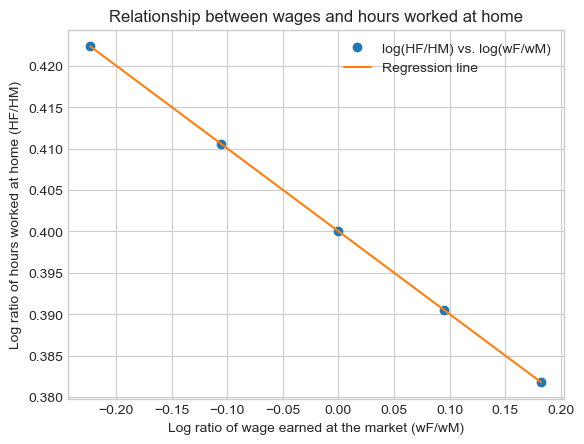

In [7]:
# Estimate the model
model.estimate()

# Calculate log of the ratio of hours worked at home
log_hours_ratio = np.log(model.sol.HF_vec / model.sol.HM_vec)

# Calculate log of the ratio of the wage earned at the market
log_wage_ratio = np.log(model.par.wF_vec / model.par.wM)

# Define the parameter values from the research paper
beta0 = 0.4
beta1 = -0.1

# Calculate the parameter values from the model
alpha = model.par.alpha
sigma = model.par.sigma
beta0_hat = model.sol.beta0
beta1_hat = model.sol.beta1
squared_deviation = ((beta0 - beta0_hat) ** 2 + (beta1 - beta1_hat) ** 2)

# Create a table of parameter values
table = [["Alpha", f"{alpha:.3f}"],["Sigma", f"{sigma:.3f}"],["Beta0", f"{beta0_hat:.3f}"],["Beta1", f"{beta1_hat:.3f}"],["Squared Deviation", f"{squared_deviation:.3f}"]]
headers = ["Parameter", "Value"]
print(tabulate(table, headers=headers, floatfmt=".3f"))

# Define the function for the line from the paper of Siminska and Yetsenga (2022)
def regression_line(x):
    return beta0_hat + beta1_hat * x

# Plot log(HF/HM) against log(wF/wM) and the regression line
fig, ax = plt.subplots()
ax.plot(log_wage_ratio, log_hours_ratio, 'o', label='log(HF/HM) vs. log(wF/wM)')
ax.plot(log_wage_ratio, regression_line(log_wage_ratio), label='Regression line')
ax.legend()
ax.set_xlabel('Log ratio of wage earned at the market (wF/wM)')
ax.set_ylabel('Log ratio of hours worked at home (HF/HM)')
ax.set_title('Relationship between wages and hours worked at home')
plt.show()


From the table we see that the parametervalues that minimize the error function is α=0.98 and σ=0.10. We notice that the model fits the data well, due to the small squared deviation. This can also be seen from the plot. An $\alpha$ value of approx. 1, shows that we have a strong degree of specialization, and hence the amount of work at home by men and women are very responsive to changes in relative wages. From question 1, we know that $\alpha>0.5$, means that women are more productive than men in home production. We have a $\sigma$ of approx. 0.1 which expresses a low degree of elasticity of substitution between men and women in working from home. This tells us that it is difficult to adjust the amount of working at home. 

# Question 5 

In this section we try to specific value of alpha = 0.5 and compares the results to the regression line proposed by siminski and yetsenga.

c:\Users\Carsten\OneDrive\Desktop\pyton\HouseholdSpecializationModel3.py:62: RuntimeWarning: overflow encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1+1e-8)/par.sigma)+par.alpha*HF**((par.sigma-1+1e-8)/par.sigma))**(par.sigma/(par.sigma-1+1e-8))


Parameter            Value
-----------------  -------
Alpha                0.500
Sigma                0.101
Beta0                0.000
Beta1               -0.101
Squared Deviation    0.160


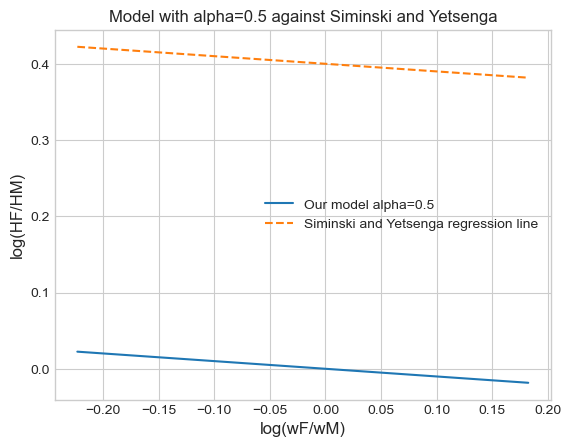

In [8]:
# Estimating model with alpha = 0.5
model.estimateS1()

# Solve for each wF value and then save the results
for i, wF in enumerate(model.par.wF_vec):
    model.par.wF = wF
    opt = model.solve()
    if len(opt) == 4:
        model.sol.LM_vec[i], model.sol.HM_vec[i], model.sol.LF_vec[i], model.sol.HF_vec[i] = opt

# Calculate HF/HM
log_HF_HM = np.log(model.sol.HF_vec / model.sol.HM_vec)

# Define log_wratio
log_wratio = np.log(model.par.wF_vec / model.par.wM)

# Calculate the parameter values from the model
beta0, beta1 = model.sol.beta0, model.sol.beta1
Squared_deviation = (0.4 - beta0) ** 2 + (-0.1 - beta1) ** 2
alpha, sigma = model.par.alpha, model.par.sigma

# Create a table of parameter values
table2 = [["Alpha", f"{alpha:.3f}"], ["Sigma", f"{sigma:.3f}"], ["Beta0", f"{beta0:.3f}"], ["Beta1", f"{beta1:.3f}"], ["Squared Deviation", f"{Squared_deviation:.3f}"]]
headers = ["Parameter", "Value"]
print(tabulate(table2, headers=headers, floatfmt=".3f"))

# Siminski and Yetsenga's regression line
def f(log_wratio):
    return 0.4 + (-0.1) * log_wratio

# Plot log(HF/HM) against log(wF/wM)
fig = plt.plot(log_wratio, log_HF_HM)
plt.plot(log_wratio, f(log_wratio), '--')
plt.legend(['Our model alpha=0.5', 'Siminski and Yetsenga regression line'])
plt.xlabel('log(wF/wM)', fontsize=12)
plt.ylabel('log(HF/HM)', fontsize=12)
plt.title('Model with alpha=0.5 against Siminski and Yetsenga')
plt.show()

We try to seek the understanding of the impact of wage differentials on the division of labor between home and the market. specifically how changes in the wage ratio influence the ratio of hours worked at home for men based on the estimated model. alpha = 0.5 represent that individuals ahve moderate preference for working at home compared to working in the market. beta1=-0,101 represent the coefficient of the ratio which mean the wage between working in the market and at home increases, individuals tend to allocate fewer hours to working at home relative to working in the market.

c:\Users\Carsten\OneDrive\Desktop\pyton\HouseholdSpecializationModel3.py:62: RuntimeWarning: invalid value encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1+1e-8)/par.sigma)+par.alpha*HF**((par.sigma-1+1e-8)/par.sigma))**(par.sigma/(par.sigma-1+1e-8))
c:\Users\Carsten\OneDrive\Desktop\pyton\HouseholdSpecializationModel3.py:62: RuntimeWarning: overflow encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1+1e-8)/par.sigma)+par.alpha*HF**((par.sigma-1+1e-8)/par.sigma))**(par.sigma/(par.sigma-1+1e-8))


Parameter            Value
-----------------  -------
Alpha                0.500
Sigma                0.101
Beta0                0.000
Beta1               -0.101
Theta                0.735
Squared Deviation    0.160


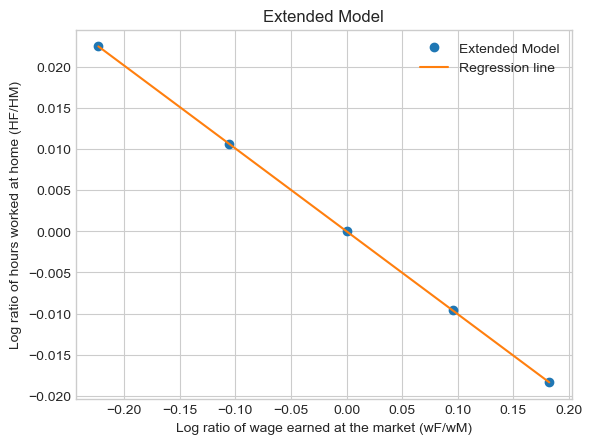

In [18]:
# Estimate the model
model.estimateS2()

# Calculate log of the ratio of hours worked at home
log_hours_ratio = np.log(model.sol.HF_vec / model.sol.HM_vec)

# Calculate log of the ratio of the wage earned at the market
log_wage_ratio = np.log(model.par.wF_vec / model.par.wM)

# Calculate the parameter values from the model
alpha = model.par.alpha
sigma = model.par.sigma
beta0_hat = model.sol.beta0
beta1_hat = model.sol.beta1
theta = model.par.theta
squared_deviation = ((beta0 - beta0_hat) ** 2 + (beta1 - beta1_hat) ** 2)

# Create a table of parameter values
table = [["Alpha", f"{alpha:.3f}"],["Sigma", f"{sigma:.3f}"],["Beta0", f"{beta0_hat:.3f}"],["Beta1", f"{beta1_hat:.3f}"],["Theta", f"{theta:.3f}"], ["Squared Deviation", f"{squared_deviation:.3f}"]]
headers = ["Parameter", "Value"]
print(tabulate(table, headers=headers, floatfmt=".3f"))

# Define the function for the line from the paper of Siminska and Yetsenga (2022)
def regression_line2(x):
    return beta0_hat + beta1_hat * x

# Plot log(HF/HM) against log(wF/wM) and the regression line
fig, ax = plt.subplots()
ax.plot(log_wage_ratio, log_hours_ratio, 'o', label='Extended Model')
ax.plot(log_wage_ratio, regression_line2(log_wage_ratio), label='Regression line')
ax.legend()
ax.set_xlabel('Log ratio of wage earned at the market (wF/wM)')
ax.set_ylabel('Log ratio of hours worked at home (HF/HM)')
ax.set_title('Extended Model')
plt.show()

the extended model: the theta value of 0.735 in this extended model modifies the relationship between wage earned at the market and the ratio of hours worked at home. which mean a higher theta indicates a stronger influence of wage differential of labor between home and the market. the theta value modify that men have a stronger incentive / motivation to be more productive when working at home compared to working in the market higher theta value does also mean that men have a greater producitvity advantage or benefit from working home. over all the theta value indicate that men choose to invest their time in home-based work when wage differentials are more favorable which indicate a stronger motivation to be procutive at home.